<a href="https://colab.research.google.com/github/ItighneS/RWAP-Assessment/blob/main/RWAP_Task_1_and_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dataset Load

In [ ]:
import pandas as pd
import re
import gdown

# The direct download link for the file suggested by gdown
file_link = "https://drive.google.com/uc?id=1whKOw8jr4qTROv8Tqn5FkBr6K5YrHQqD"

# Download the file using gdown
output_path = "final_merged_spatial_dataset.csv"
gdown.download(file_link, output_path, quiet=False)

# Read the downloaded file into a pandas DataFrame
df = pd.read_csv(output_path)

display(df.head())

Downloading...
From: https://drive.google.com/uc?id=1whKOw8jr4qTROv8Tqn5FkBr6K5YrHQqD
To: /content/final_merged_spatial_dataset.csv
100%|██████████| 28.6M/28.6M [00:00<00:00, 46.9MB/s]


,Owned or Leased,GSA Region,Street Address,City_d1,State_d1,Zip Code,Latitude,Longitude,Building Rentable Square Feet,Construction Date,...,31-10-2024,30-11-2024,31-12-2024,31-01-2025,28-02-2025,31-03-2025,30-04-2025,31-05-2025,30-06-2025,31-07-2025
0,1,5,2565 THOMPSON BRIDGE RD,4749,11,30501,34.339030,-83.848641,17844.0,2000.0,...,319391.1498,319209.3326,319387.8564,320261.5089,320979.2581,320612.6590,319239.9838,317758.0597,316357.0622,315321.3891
1,1,6,345 W WASHINGTON AVE,7687,53,53703,43.071400,-89.387941,10089.0,2000.0,...,441929.4504,438049.3722,435918.5197,438381.5927,444485.0263,451881.0555,454033.7301,451965.5581,444850.6007,437620.9190
2,1,6,1301 1/2 7TH ST NW,10844,25,55901,44.031849,-92.481598,3041.0,2000.0,...,315897.2637,317135.8252,318925.9516,320505.4305,321503.6425,321280.9695,320912.7530,320710.2673,321219.4856,321951.6561
3,1,4,1718 WOODLAWN DR,13765,22,21207,39.314760,-76.737771,160810.0,2000.0,...,280806.0869,281652.4796,283156.2792,285186.7589,286673.5245,287289.5276,287505.4901,287767.4424,287971.5275,288681.2816
4,1,9,466 TUCKER ST,1892,6,81625,40.513620,-107.545000,5000.0,2000.0,...,303888.7606,305170.6763,306224.2975,306459.1347,307114.9897,307331.2458,308593.0317,310081.6368,311277.9303,312586.7830


In [ ]:
import gdown
import json

# --- Dataset 1 mapping ---
# Shared link provided by the user: https://drive.google.com/file/d/1-KjwwMrAxDACaatKwfJIFBLgMzZ2kc3N/view?usp=drive_link
# Extracted File ID: 1-KjwwMrAxDACaatKwfJIFBLgMzZ2kc3N
file_link_d1 = "https://drive.google.com/uc?id=1-KjwwMrAxDACaatKwfJIFBLgMzZ2kc3N"
output_path_d1 = "encoding_mappings_dataset1.json"
gdown.download(file_link_d1, output_path_d1, quiet=False)

with open(output_path_d1, "r") as f:
    encoding_mappings_dataset1 = json.load(f)

# --- Dataset 2 mapping ---
# Shared link provided by the user: https://drive.google.com/file/d/15uRFdVxF7q_6QvCyiqFCR1qMAp-r-N19/view?usp=drive_link
# Extracted File ID: 15uRFdVxF7q_6QvCyiqFCR1qMAp-r-N19
file_link_d2 = "https://drive.google.com/uc?id=15uRFdVxF7q_6QvCyiqFCR1qMAp-r-N19"
output_path_d2 = "encoding_mappings_dataset2.json"
gdown.download(file_link_d2, output_path_d2, quiet=False)

with open(output_path_d2, "r") as f:
    encoding_mappings_dataset2 = json.load(f)

# Quick check
print("Dataset1 mappings keys:", list(encoding_mappings_dataset1.keys())[:5])
print("Dataset2 mappings keys:", list(encoding_mappings_dataset2.keys())[:5])

Downloading...
From: https://drive.google.com/uc?id=1-KjwwMrAxDACaatKwfJIFBLgMzZ2kc3N
To: /content/encoding_mappings_dataset1.json
100%|██████████| 410k/410k [00:00<00:00, 82.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=15uRFdVxF7q_6QvCyiqFCR1qMAp-r-N19
To: /content/encoding_mappings_dataset2.json
100%|██████████| 488k/488k [00:00<00:00, 49.7MB/s]

Dataset1 mappings keys: ['Owned or Leased', 'State', 'City', 'GSA Region', 'Congressional District']
Dataset2 mappings keys: ['CountyName', 'State', 'City', 'Metro']


##Dataset Prepare

In [ ]:
# Detect monthly index columns (dd-mm-YYYY format)
date_cols = [c for c in df.columns if re.match(r"\d{2}-\d{2}-\d{4}", c)]
date_cols_sorted = sorted(date_cols, key=lambda x: pd.to_datetime(x, dayfirst=True))

earliest_col = date_cols_sorted[0]
latest_col = date_cols_sorted[-1]

print("Earliest index:", earliest_col)
print("Latest index:", latest_col)

Earliest index: 31-01-2000
Latest index: 31-07-2025


###Creating Valuation Features for Modelling

In [ ]:
median_area = df["Building Rentable Square Feet"].median()

# Proxy valuation
df["valuation_proxy"] = df[latest_col] * (df["Building Rentable Square Feet"] / median_area)

# Valuation per sqft
df["valuation_per_sqft"] = df["valuation_proxy"] / df["Building Rentable Square Feet"]

# Growth % (2000 → 2025)
df["growth_2000_2025_pct"] = (df[latest_col] / df[earliest_col] - 1) * 100

###Treating Missing Values

In [ ]:
# Categorical fill
for col in ["Owned or Leased","GSA Region","State_d1","City_d1",
            "Real Property Asset Type","Building Status"]:
    df[col] = df[col].fillna("Unknown")

# Numeric fill
for col in ["Building Rentable Square Feet","Building Age","Latitude","Longitude"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        df[col] = df[col].fillna(df[col].median())


In [ ]:
latest_col = date_cols_sorted[-1]

# If missing, backfill from the most recent available earlier index
df[latest_col] = df[latest_col].fillna(
    df[date_cols_sorted[::-1]].bfill(axis=1)[latest_col]
)

In [ ]:
import json

# --- Load encoding mapping JSONs ---
with open("encoding_mappings_dataset1.json", "r") as f1:
    enc_map_d1 = json.load(f1)

with open("encoding_mappings_dataset2.json", "r") as f2:
    enc_map_d2 = json.load(f2)

# --- Decode categorical columns in the DataFrame ---
for col in df.columns:
    # Apply dataset1 mapping if column exists there
    if col in enc_map_d1:
        df[col] = df[col].astype(str).map(enc_map_d1[col]).fillna(df[col])
    # Otherwise, apply dataset2 mapping if column exists there
    elif col in enc_map_d2:
        df[col] = df[col].astype(str).map(enc_map_d2[col]).fillna(df[col])

# --- Optional: Fill still-missing categorical values ---
cat_cols = ["Owned or Leased", "GSA Region", "State_d1", "City_d1",
            "Real Property Asset Type", "Building Status"]

for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].fillna("Unknown")

print("✅ All applicable categorical columns decoded successfully.")


✅ All applicable categorical columns decoded successfully.


##TASK 1 : Valuation Model

In [ ]:
# ==========================================
# STEP 3 — Time-aware valuation (ALL TYPES)
# ==========================================
import re, os
import numpy as np
import pandas as pd

# (Uncomment if df not in memory)
# path = "/content/drive/MyDrive/RWAP/final_merged_spatial_dataset.csv"
# df = pd.read_csv(path)

# ---------- Detect monthly index columns ----------
date_cols = [c for c in df.columns if re.match(r"^\d{2}-\d{2}-\d{4}$", str(c))]
date_cols_sorted = sorted(date_cols, key=lambda x: pd.to_datetime(x, dayfirst=True))
assert len(date_cols_sorted) > 0, "No date index columns detected."

earliest_col = date_cols_sorted[0]
latest_col   = date_cols_sorted[-1]

# Coerce index columns to numeric safely
for c in date_cols_sorted:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# ---------- Masks by asset type ----------
# 1 = Land, 2 = Structure, others = Buildings
land_mask      = (df["Real Property Asset Type"] == 1)
structure_mask = (df["Real Property Asset Type"] == 2)
building_mask  = ~land_mask & ~structure_mask

# ---------- Helper: safe growth factors ----------
def years_between(col_start: str, col_end: str) -> float:
    return max(1e-6, (pd.to_datetime(col_end, dayfirst=True) - pd.to_datetime(col_start, dayfirst=True)).days/365.25)

years_long   = years_between(earliest_col, latest_col)
recent_start = "28-02-2022" if "28-02-2022" in df.columns else date_cols_sorted[max(0, len(date_cols_sorted)-42)]  # ~3.5 yrs fallback
years_recent = years_between(recent_start, latest_col)

with np.errstate(divide='ignore', invalid='ignore'):
    cagr_long = (df[latest_col] / df[earliest_col])**(1/years_long) - 1
    cagr_recent = (df[latest_col] / df[recent_start])**(1/years_recent) - 1

cagr_long   = cagr_long.replace([np.inf, -np.inf], np.nan).fillna(0)
cagr_recent = cagr_recent.replace([np.inf, -np.inf], np.nan).fillna(0)

# clip multipliers to avoid extremes
long_factor   = (1 + cagr_long).clip(0.25, 2.5)
recent_factor = (1 + cagr_recent).clip(0.25, 2.5)

# ---------- BUILDINGS: level × size × long-term growth ----------
area_col = "Building Rentable Square Feet"
median_area_bldg = (
    df.loc[building_mask, area_col]
      .replace(0, np.nan)
      .median()
)
if not np.isfinite(median_area_bldg) or median_area_bldg <= 0:
    median_area_bldg = df[area_col].replace(0, np.nan).median()

df.loc[building_mask, "valuation_proxy"] = (
    df.loc[building_mask, latest_col] *
    (df.loc[building_mask, area_col].replace(0, np.nan) / median_area_bldg).fillna(1.0) *
    long_factor[building_mask]
)

df.loc[building_mask, "valuation_per_sqft"] = (
    df.loc[building_mask, "valuation_proxy"] /
    df.loc[building_mask, area_col].replace(0, np.nan)
)

# ---------- LAND: mean(recent level) × recent growth ----------
recent_cols = [c for c in date_cols_sorted if pd.to_datetime(c, dayfirst=True) >= pd.to_datetime(recent_start, dayfirst=True)]
df.loc[land_mask, "valuation_proxy"] = (
    df.loc[land_mask, recent_cols].mean(axis=1) *
    recent_factor[land_mask]
)
df.loc[land_mask, "valuation_per_sqft"] = np.nan  # not meaningful for land

# ---------- STRUCTURES: TREND-BASED PROJECTION (31-10-2023 → 31-07-2025) ----------
# Window explicitly requested by you:
struct_from = "31-10-2023"
struct_to   = "31-07-2025"
# Verify columns exist; if not, pick nearest inside the range
def nearest_or_self(col_name: str):
    if col_name in df.columns:
        return col_name
    # find nearest by date
    target = pd.to_datetime(col_name, dayfirst=True)
    nearest = min(date_cols_sorted, key=lambda c: abs(pd.to_datetime(c, dayfirst=True) - target))
    return nearest

struct_from = nearest_or_self(struct_from)
struct_to   = nearest_or_self(struct_to)

struct_window_cols = [c for c in date_cols_sorted
                      if pd.to_datetime(c, dayfirst=True) >= pd.to_datetime(struct_from, dayfirst=True)
                      and pd.to_datetime(c, dayfirst=True) <= pd.to_datetime(struct_to, dayfirst=True)]
assert len(struct_window_cols) > 0, "No columns in the requested structure window."

# For each structure row:
#   1) take available points in [31-10-2023 ... 31-07-2025]
#   2) fit a simple linear trend y = a + b*t on present months
#   3) predict y at t = last month (31-07-2025) to get a near-accurate latest value
#   4) if <2 points available: fall back to last non-null in window, else median of window, else recent mean
t_index = np.arange(len(struct_window_cols))  # 0 ... n-1, last is the target index

vals = df.loc[structure_mask, struct_window_cols].copy()

def row_trend_project(row_vals: pd.Series) -> float:
    y = row_vals.values.astype(float)
    mask = np.isfinite(y)
    if mask.sum() >= 2:
        # linear fit on available months
        x = t_index[mask]
        yy = y[mask]
        # robust-ish: clip target value after prediction if extreme
        slope, intercept = np.polyfit(x, yy, 1)
        pred = intercept + slope * t_index[-1]
        # mild clipping to avoid negatives or absurd spikes
        if not np.isfinite(pred):
            pred = np.nan
        return max(pred, 0.0)
    elif mask.sum() == 1:
        # only one data point → use it
        return float(yy[0]) if 'yy' in locals() else float(y[mask][0])
    else:
        # no data in window → fallback rules
        last_non_null = np.nan
        # try recent_cols mean (2022+)
        recent_mean = np.nanmean(row_vals.values)  # window mean; may be nan
        return float(recent_mean) if np.isfinite(recent_mean) else np.nan

proj_latest = vals.apply(row_trend_project, axis=1)

# Assign to valuation for structures
df.loc[structure_mask, "valuation_proxy"] = proj_latest.values

# Optional: if you want to incorporate a gentle recency factor (very light):
# df.loc[structure_mask, "valuation_proxy"] *= np.sqrt(recent_factor[structure_mask].values.clip(0.5, 1.5))

# Per sqft for structures (may be low-information; keep for completeness)
df.loc[structure_mask, "valuation_per_sqft"] = (
    df.loc[structure_mask, "valuation_proxy"] /
    df.loc[structure_mask, area_col].replace(0, np.nan)
)

# ---------- Easy-to-read summaries ----------
summary_overall = {
    "Total Assets": int(len(df)),
    "Buildings (count)": int(building_mask.sum()),
    "Land (count)": int(land_mask.sum()),
    "Structures (count)": int(structure_mask.sum()),
    "Median Valuation (all)": float(np.nanmedian(df["valuation_proxy"])),
    "Mean Valuation (all)": float(np.nanmean(df["valuation_proxy"])),
}

top10 = df.nlargest(10, "valuation_proxy", keep="all")[
    ["Street Address","City_d1","State_d1","Real Property Asset Type","valuation_proxy"]
]
by_state = df.groupby("State_d1", dropna=False)["valuation_proxy"].median().sort_values(ascending=False).head(10)
by_type  = df.groupby("Real Property Asset Type", dropna=False)["valuation_proxy"].median().sort_values(ascending=False)

print("Earliest index column:", earliest_col, "| Latest index column:", latest_col)
print("Structure window:", struct_from, "→", struct_to)
print("\n=== Task 1 Summary (Easy to Explain) ===")
print(summary_overall, "\n")
print("Top 10 Assets by Valuation:")
print(top10.to_string(index=False), "\n")
print("Top States by Median Valuation:")
print(by_state.to_string(), "\n")
print("Valuation by Asset Type (median):")
print(by_type.to_string())

# Save enriched dataset
out_csv = "/content/drive/MyDrive/RWAP/task1_valuations_timeaware.csv"
os.makedirs(os.path.dirname(out_csv), exist_ok=True)
df.to_csv(out_csv, index=False)
print(f"\n✅ Saved enriched valuations to: {out_csv}")

Earliest index column: 31-01-2000 | Latest index column: 31-07-2025
Structure window: 31-10-2023 → 31-07-2025

=== Task 1 Summary (Easy to Explain) ===
{'Total Assets': 8394, 'Buildings (count)': 8037, 'Land (count)': 47, 'Structures (count)': 310, 'Median Valuation (all)': 344695.4474567994, 'Mean Valuation (all)': 2016209.5428349494} 

Top 10 Assets by Valuation:
          Street Address  City_d1  State_d1  Real Property Asset Type  valuation_proxy
        26 FEDERAL PLAZA     8969        37                       0.0     2.564135e+08
        26 FEDERAL PLAZA     8969        37                       0.0     2.434689e+08
            290 BROADWAY     8969        37                       0.0     2.145622e+08
            500 PEARL ST     8969        37                       0.0     1.910573e+08
           201 VARICK ST     8969        37                       0.0     1.571008e+08
            40 CENTRE ST     8969        37                       0.0     1.510223e+08
          24000 AVILA R

In [ ]:
# ==========================================
# STEP 4 — Train valuation model (CatBoost)
# (No scaling, no one-hot; robust to categoricals)
# ==========================================
!pip install -q catboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from catboost import CatBoostRegressor, Pool
import joblib, os

# If df not in memory, reload enriched file produced above
if "df" not in globals():
    df = pd.read_csv("/content/drive/MyDrive/RWAP/task1_valuations_timeaware.csv")

target = "valuation_proxy"

cat_features = [
    "Owned or Leased","GSA Region","State_d1","City_d1",
    "Real Property Asset Type","Building Status","Metro","CountyName"
]
num_features = [
    "Building Rentable Square Feet","Building Age","Latitude","Longitude"
]
# add engineered signals if present
for extra in ["valuation_per_sqft"]:
    if extra in df.columns:
        num_features.append(extra)

# keep only existing
cat_features = [c for c in cat_features if c in df.columns]
num_features = [c for c in num_features if c in df.columns]
features = cat_features + num_features

# filter valid target
work = df.loc[np.isfinite(df[target]), features + [target]].copy()

# CatBoost needs categoricals as strings; fill unknowns
for c in cat_features:
    # keep NaN for now then replace with "Unknown"
    work[c] = work[c].astype(object).where(work[c].notna(), "Unknown").astype(str)
    work.loc[work[c].isin(["nan","NaN","None","<NA>","NaT"]), c] = "Unknown"
    work[c] = work[c].str.strip()

# numeric safety
for c in num_features:
    work[c] = pd.to_numeric(work[c], errors="coerce")
    work[c] = work[c].fillna(work[c].median())

X = work[features]
y = work[target]
cat_idx = [X.columns.get_loc(c) for c in cat_features]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

train_pool = Pool(X_train, y_train, cat_features=cat_idx if len(cat_idx)>0 else None)
test_pool  = Pool(X_test,  y_test,  cat_features=cat_idx if len(cat_idx)>0 else None)

model = CatBoostRegressor(
    loss_function="RMSE",
    eval_metric="MAE",
    depth=8,
    learning_rate=0.05,
    n_estimators=1000,
    random_state=42,
    verbose=100
)
model.fit(train_pool, eval_set=test_pool, use_best_model=True)

pred = model.predict(test_pool)
mae = mean_absolute_error(y_test, pred)
r2  = r2_score(y_test, pred)
print(f"\nFINAL TEST — MAE: {mae:,.2f} | R²: {r2:.4f}")

save_dir = "/content/drive/MyDrive/RWAP"
os.makedirs(save_dir, exist_ok=True)
cbm_path = os.path.join(save_dir, "asset_valuation_model.cbm")
model.save_model(cbm_path)
joblib.dump(model, os.path.join(save_dir, "asset_valuation_model.joblib"))
print(f"✅ Saved model to: {cbm_path}")

# === Replace your failing "pred_all = model.predict(...)" block with this ===

# Recreate the same feature list used for training
cat_features = [
    "Owned or Leased","GSA Region","State_d1","City_d1",
    "Real Property Asset Type","Building Status","Metro","CountyName"
]
num_features = [
    "Building Rentable Square Feet","Building Age","Latitude","Longitude","valuation_per_sqft"
]
# keep only columns that exist
cat_features = [c for c in cat_features if c in df.columns]
num_features = [c for c in num_features if c in df.columns]
features = cat_features + num_features

# Build a copy of the full feature frame
X_full = df[features].copy()

# --- Make categoricals CatBoost-safe (identical logic to training) ---
for c in cat_features:
    # ensure object/string dtype, fill missing with "Unknown"
    X_full[c] = X_full[c].astype(object).where(X_full[c].notna(), "Unknown").astype(str)
    # normalize odd tokens and trim spaces
    X_full.loc[X_full[c].isin(["nan","NaN","None","<NA>","NaT"]), c] = "Unknown"
    X_full[c] = X_full[c].str.strip()

# --- Numeric safety (same as training) ---
for c in num_features:
    X_full[c] = pd.to_numeric(X_full[c], errors="coerce")
    X_full[c] = X_full[c].fillna(X_full[c].median())

# Indices of categoricals in the current (full) feature set
cat_idx = [X_full.columns.get_loc(c) for c in cat_features]

# Predict for all rows
full_pool = Pool(X_full, cat_features=cat_idx if len(cat_idx)>0 else None)
pred_all = model.predict(full_pool)

# Attach and save
df_out = df.copy()
df_out["predicted_valuation"] = pred_all
out_preds = "/content/drive/MyDrive/RWAP/task1_valuations_with_preds.csv"
df_out.to_csv(out_preds, index=False)
print(f"✅ Saved predictions to: {out_preds}")


0:	learn: 2583986.2162627	test: 2509837.2620292	best: 2509837.2620292 (0)	total: 88.5ms	remaining: 1m 28s
100:	learn: 365484.9181836	test: 448210.5352224	best: 448210.5352224 (100)	total: 5.6s	remaining: 49.8s
200:	learn: 192200.6664788	test: 293632.3741730	best: 293632.3741730 (200)	total: 9.18s	remaining: 36.5s
300:	learn: 142243.0716311	test: 252016.3595621	best: 252016.3595621 (300)	total: 11.1s	remaining: 25.8s
400:	learn: 119492.5317956	test: 236826.4358363	best: 236826.4358363 (400)	total: 13s	remaining: 19.4s
500:	learn: 100624.7621363	test: 226661.6810790	best: 226661.6810790 (500)	total: 14.9s	remaining: 14.8s
600:	learn: 87905.6311089	test: 221790.6301051	best: 221790.6301051 (600)	total: 16.8s	remaining: 11.2s
700:	learn: 78871.5812991	test: 218250.2467801	best: 218244.6782992 (699)	total: 19.5s	remaining: 8.33s
800:	learn: 71930.6588328	test: 215767.5836478	best: 215758.6854322 (798)	total: 21.4s	remaining: 5.31s
900:	learn: 65822.1697872	test: 213762.9378436	best: 213762.

#Task 3: Machine Learning Model

Downloading...
From: https://drive.google.com/uc?id=1PQhDafw41pe3DAcV6Cf5eakstuyDiZU7
To: /content/task1_valuations_with_preds.csv
100%|██████████| 29.4M/29.4M [00:01<00:00, 24.1MB/s]


✅ Data shape: (8394, 333)


,Owned or Leased,GSA Region,Street Address,City_d1,State_d1,Zip Code,Latitude,Longitude,Building Rentable Square Feet,Construction Date,...,30-04-2025,31-05-2025,30-06-2025,31-07-2025,valuation_proxy,valuation_per_sqft,growth_2000_2025_pct,cagr_2000_2025,cagr_2022_2025,predicted_valuation
0,1,3,2565 THOMPSON BRIDGE RD,GAINESVILLE,11,30501,34.339030,-83.848641,17844.0,2000.0,...,319239.9838,317758.0597,316357.0622,315321.3891,543182.103873,30.440602,198.833025,0.044761,0.045491,500747.474184
1,1,4,345 W WASHINGTON AVE,MADISON,53,53703,43.071400,-89.387941,10089.0,2000.0,...,454033.7301,451965.5581,444850.6007,437620.9190,431247.055850,42.744281,302.679938,0.057300,0.012852,486399.750581
2,1,4,1301 1/2 7TH ST NW,ROCHESTER,25,55901,44.031849,-92.481598,3041.0,2000.0,...,320912.7530,320710.2673,321219.4856,321951.6561,94109.324951,30.946835,167.694933,0.040173,0.029679,103580.368354


Silhouette scores: [(2, np.float64(0.6539540712979399)), (3, np.float64(0.2332659869333836)), (4, np.float64(0.26663436195154044)), (5, np.float64(0.2750089823851955)), (6, np.float64(0.2910307464576937)), (7, np.float64(0.3240899527549718)), (8, np.float64(0.32626208391489636))]
Best k by silhouette: 2 (score=0.654)

Share of asset types within each valuation class (row=class, values=proportion):


Real Property Asset Type,0,2
ValClass_KMeans_Name,,
High-Value • High • Size • Older,1.00,0.00
Mid-Value • Mid • Size • Newer,0.98,0.02


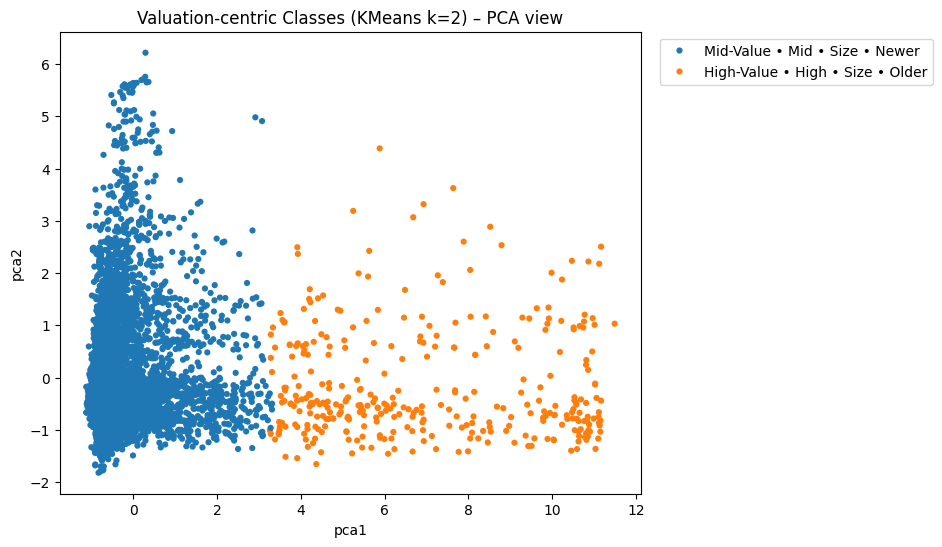

✅ Saved: /content/drive/MyDrive/RWAP/assets_with_valuation_classes.csv
✅ Saved: /content/drive/MyDrive/RWAP/valuation_class_name_map.csv


In [ ]:
# ==========================================
# Unsupervised: Valuation-centric asset classes
# (to use as features for supervised Asset Type prediction)
# Google Colab script
# ==========================================

!pip install -q scikit-learn pandas numpy matplotlib seaborn gdown

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown # Import gdown

# from google.colab import files # No longer needed for upload
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# -------------------------------
# 1) Load data
# -------------------------------
# Use gdown to download from the shared link
file_link = "https://drive.google.com/uc?id=1PQhDafw41pe3DAcV6Cf5eakstuyDiZU7" # Direct download link
output_path = "task1_valuations_with_preds.csv"
print(f"Downloading {output_path} from Google Drive...")
gdown.download(file_link, output_path, quiet=False)

# Read the downloaded file into a pandas DataFrame
df = pd.read_csv(output_path)
print("✅ Data shape:", df.shape)
display(df.head(3))

# -------------------------------
# 2) Feature engineering (valuation-centric)
# -------------------------------
# Ensure these columns exist if possible
num_cols_present = [c for c in [
    "predicted_valuation", "valuation_proxy",
    "Building Rentable Square Feet", "Building Age",
    "Latitude", "Longitude"
] if c in df.columns]

# Derived: valuation per sqft (robust valuation driver)
if "predicted_valuation" in df.columns and "Building Rentable Square Feet" in df.columns:
    df["valuation_per_sqft"] = df["predicted_valuation"] / np.where(df["Building Rentable Square Feet"] > 0,
                                                                    df["Building Rentable Square Feet"], np.nan)
elif "valuation_proxy" in df.columns and "Building Rentable Square Feet" in df.columns:
    df["valuation_per_sqft"] = df["valuation_proxy"] / np.where(df["Building Rentable Square Feet"] > 0,
                                                                df["Building Rentable Square Feet"], np.nan)

# Candidate numeric set, prioritizing valuation signals
feature_candidates = []
for c in ["predicted_valuation", "valuation_proxy", "valuation_per_sqft",
          "Building Rentable Square Feet", "Building Age", "Latitude", "Longitude"]:
    if c in df.columns: feature_candidates.append(c)

X = df[feature_candidates].copy()

# Drop rows with missing in core valuation fields
core_for_drop = [c for c in ["predicted_valuation","valuation_proxy","valuation_per_sqft"] if c in X.columns]
if core_for_drop:
    X = X.dropna(subset=core_for_drop)
else:
    X = X.dropna()

# Keep index to merge labels back
ix = X.index

# -------------------------------
# 3) Mild winsorization to reduce extreme outliers effect
# -------------------------------
def winsorize_col(s, q=0.01):
    low, high = s.quantile(q), s.quantile(1-q)
    return s.clip(lower=low, upper=high)

X_w = X.copy()
for c in X_w.columns:
    X_w[c] = winsorize_col(pd.to_numeric(X_w[c], errors="coerce"))

# -------------------------------
# 4) Scale features
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_w)

# -------------------------------
# 5) Pick k with Silhouette (KMeans)
# -------------------------------
k_grid = range(2, 9)
sil_scores = []
best_k = None
best_s = -1
for k in k_grid:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(X_scaled)
    # If a cluster gets empty or all samples same label, silhouette can fail
    try:
        s = silhouette_score(X_scaled, labels)
    except Exception:
        s = -1
    sil_scores.append((k, s))
    if s > best_s:
        best_s = s
        best_k = k

print("Silhouette scores:", sil_scores)
print(f"Best k by silhouette: {best_k} (score={best_s:.3f})")

# Final KMeans with best_k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
labels_km = kmeans.fit_predict(X_scaled)

# Alternative soft clustering (optionally useful later)
gmm_k = best_k
gmm = GaussianMixture(n_components=gmm_k, random_state=42)
gmm.fit(X_scaled)
labels_gmm = gmm.predict(X_scaled)              # hard labels
probs_gmm   = gmm.predict_proba(X_scaled)       # soft probs per class

# -------------------------------
# 6) Human-friendly names for classes
#    (Value band × Size band × Age band)
# -------------------------------
# Compute quantiles on the FULL (unfiltered) df for naming thresholds
def get_q(series, q1=0.33, q2=0.67):
    # Ensure series is numeric and handle NaN
    numeric_series = pd.to_numeric(series, errors='coerce').dropna()
    if numeric_series.empty:
        return (None, None)
    return np.nanpercentile(numeric_series, 100*q1), np.nanpercentile(numeric_series, 100*q2)


val_col = "predicted_valuation" if "predicted_valuation" in df.columns else (
          "valuation_proxy" if "valuation_proxy" in df.columns else (feature_candidates[0] if feature_candidates else None))

size_col = "Building Rentable Square Feet" if "Building Rentable Square Feet" in df.columns else None
age_col  = "Building Age" if "Building Age" in df.columns else None

val_q = get_q(df[val_col]) if val_col and val_col in df.columns else (None, None)
size_q = get_q(df[size_col]) if size_col and size_col in df.columns else (None, None)
age_q  = get_q(df[age_col])  if age_col and age_col in df.columns else (None, None)

def bucket(v, qlow, qhigh, inverse=False):
    if v is None or np.isnan(v) or qlow is None or qhigh is None: return "—"
    if v <= qlow: b = "Low"
    elif v >= qhigh: b = "High"
    else: b = "Mid"
    if inverse:  # for age, high = older
        return {"Low":"Newer","Mid":"Mid","High":"Older"}[b]
    return b

# Build profile per cluster (using medians) for naming
prof_km = pd.DataFrame({"Cluster": labels_km, "idx": ix}).merge(
    X_w.assign(idx=ix), on="idx", how="left"
).groupby("Cluster")[ [c for c in [val_col, size_col, age_col] if c and c in X_w.columns] ].median()

def make_name(row):
    parts = []
    if val_col and val_q != (None, None):  parts.append(f"{bucket(row.get(val_col), *val_q)}-Value")
    if size_col and size_q != (None, None): parts.append(f"{bucket(row.get(size_col), *size_q)} • Size")
    if age_col and age_q != (None, None):  parts.append(bucket(row.get(age_col), *age_q, inverse=True))
    return " • ".join(parts) if parts else "Class"

name_map_km = {int(c): make_name(r) for c, r in prof_km.iterrows()}

# -------------------------------
# 7) Attach labels back and profile vs REAL Asset Type
# -------------------------------
out = df.copy()
out.loc[ix, "ValClass_KMeans"] = labels_km
out.loc[ix, "ValClass_KMeans_Name"] = pd.Series(labels_km, index=ix).map(name_map_km)

# Optional: add GMM label & max-prob
out.loc[ix, "ValClass_GMM"] = labels_gmm
out.loc[ix, "ValClass_GMM_Conf"] = pd.Series(probs_gmm.max(axis=1), index=ix)

# Profile: how valuation classes align with REAL Asset Type (if present)
target_col = "Real Property Asset Type" if "Real Property Asset Type" in out.columns else None
if target_col and not out[target_col].isna().all():
    # Ensure target column is string for consistent crosstab behavior
    out[target_col] = out[target_col].astype(str).fillna("Unknown")
    cross = pd.crosstab(out["ValClass_KMeans_Name"], out[target_col], normalize="index").round(3)
    print("\nShare of asset types within each valuation class (row=class, values=proportion):")
    display(cross)
else:
    print("\nReal Property Asset Type column not found or contains only missing values. Skipping cross-tabulation.")


# -------------------------------
# 8) PCA visualization (for report)
# -------------------------------
if X_scaled.shape[1] >= 2: # Ensure there are at least 2 components for PCA
    pca = PCA(n_components=2, random_state=42)
    pc2 = pca.fit_transform(X_scaled)
    pca_df = pd.DataFrame({
        "pca1": pc2[:,0], "pca2": pc2[:,1],
        "ValClass": [name_map_km.get(l, "Unknown") for l in labels_km] # Use .get for safety
    }, index=ix)

    plt.figure(figsize=(7.5,6))
    sns.scatterplot(data=pca_df, x="pca1", y="pca2", hue="ValClass", s=20, linewidth=0)
    plt.title(f"Valuation-centric Classes (KMeans k={best_k}) – PCA view")
    plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.show()
else:
    print("\nNot enough features for PCA visualization (need at least 2).")

# -------------------------------
# 9) Save outputs for supervised step
# -------------------------------
import os
os.makedirs("/content/drive/MyDrive/RWAP", exist_ok=True) # Ensure directory exists

out_csv_path = "/content/drive/MyDrive/RWAP/assets_with_valuation_classes.csv"
out.to_csv(out_csv_path, index=False)
print(f"✅ Saved: {out_csv_path}")

# (Optional) save the name map for later use in apps
name_map_df = pd.DataFrame(
    [(k, v) for k, v in name_map_km.items()], columns=["ValClass_KMeans","ValClass_KMeans_Name"]
)
name_map_path = "/content/drive/MyDrive/RWAP/valuation_class_name_map.csv"
name_map_df.to_csv(name_map_path, index=False)
print(f"✅ Saved: {name_map_path}")

# Download files (optional, for local use)
# from google.colab import files
# files.download(out_csv_path)
# files.download(name_map_path)

✅ Data shape: (8394, 337)


,Owned or Leased,GSA Region,Street Address,City_d1,State_d1,Zip Code,Latitude,Longitude,Building Rentable Square Feet,Construction Date,...,valuation_proxy,valuation_per_sqft,growth_2000_2025_pct,cagr_2000_2025,cagr_2022_2025,predicted_valuation,ValClass_KMeans,ValClass_KMeans_Name,ValClass_GMM,ValClass_GMM_Conf
0,1,3,2565 THOMPSON BRIDGE RD,GAINESVILLE,11,30501,34.339030,-83.848641,17844.0,2000.0,...,543182.103873,28.062513,198.833025,0.044761,0.045491,500747.474184,0.0,Mid-Value • Mid • Size • Newer,0.0,0.999992
1,1,4,345 W WASHINGTON AVE,MADISON,53,53703,43.071400,-89.387941,10089.0,2000.0,...,431247.055850,48.210898,302.679938,0.057300,0.012852,486399.750581,0.0,Mid-Value • Mid • Size • Newer,0.0,0.999986
2,1,4,1301 1/2 7TH ST NW,ROCHESTER,25,55901,44.031849,-92.481598,3041.0,2000.0,...,94109.324951,34.061285,167.694933,0.040173,0.029679,103580.368354,0.0,Mid-Value • Mid • Size • Newer,0.0,0.999997


Numeric features: ['predicted_valuation', 'valuation_proxy', 'valuation_per_sqft', 'Building Rentable Square Feet', 'Building Age', 'Latitude', 'Longitude', 'ValClass_GMM_Conf']
Categorical features: ['Owned or Leased', 'GSA Region', 'State_d1', 'City_d1', 'Building Status', 'Metro', 'CountyName', 'Zip Code', 'ValClass_KMeans', 'ValClass_GMM']
Label map: {0: '0', 1: '1', 2: '2'}

=== RandomForest Results (with clusters as base) ===
Accuracy: 0.973198332340679
Macro-F1: 0.7404133015578799
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1608
           1       0.71      0.56      0.62         9
           2       0.74      0.52      0.61        62

    accuracy                           0.97      1679
   macro avg       0.81      0.69      0.74      1679
weighted avg       0.97      0.97      0.97      1679



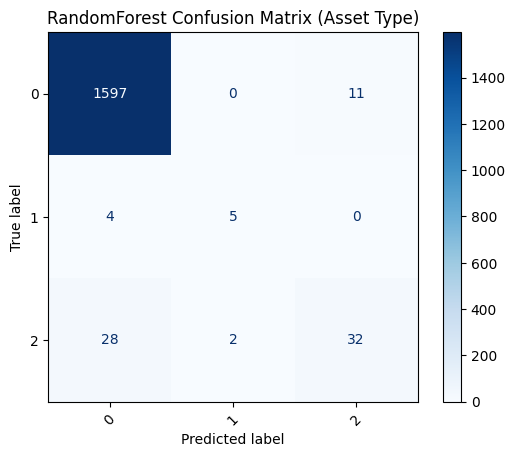

✅ Saved RandomForest model and label map to runtime.

=== CatBoost Results (with clusters as base) ===
Accuracy: 0.9755807027992853
Macro-F1: 0.7951569542076449
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1608
           1       0.70      0.78      0.74         9
           2       0.74      0.60      0.66        62

    accuracy                           0.98      1679
   macro avg       0.81      0.79      0.80      1679
weighted avg       0.97      0.98      0.97      1679



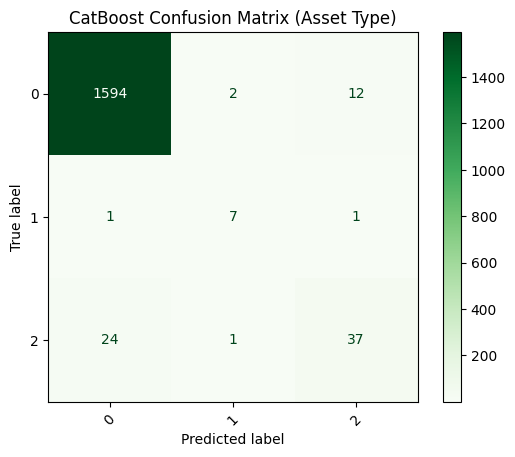

✅ Saved CatBoost model, features list, and label map to runtime.


In [ ]:
# ==========================================
# Task 3 - Supervised Learning (with clusters as base)
# Predict REAL Asset Type using valuation + unsupervised classes
# ==========================================

!pip install -q scikit-learn imbalanced-learn catboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from catboost import CatBoostClassifier, Pool
import joblib, json

# -------------------------
# 1) Load clustered dataset
# -------------------------
# Load the file directly from the Colab runtime environment
csv_name = "assets_with_valuation_classes.csv"
try:
    df = pd.read_csv(csv_name)
    print("✅ Data shape:", df.shape)
    display(df.head(3))
except FileNotFoundError:
    print(f"Error: File '{csv_name}' not found in the runtime environment.")
    print("Please ensure the previous step (Task 2) successfully saved the file.")
    df = None # Set df to None to avoid errors later

# -------------------------
# 2) Define target & features
# -------------------------
if df is not None: # Only proceed if df was loaded successfully
    TARGET_COL = "Real Property Asset Type"  # Actual asset type

    # Numeric features
    num_candidates = [
        "predicted_valuation", "valuation_proxy", "valuation_per_sqft",
        "Building Rentable Square Feet", "Building Age", "Latitude", "Longitude"
    ]

    # Include GMM confidence if present
    if "ValClass_GMM_Conf" in df.columns:
        num_candidates.append("ValClass_GMM_Conf")

    # Categorical features
    cat_candidates = [
        "Owned or Leased", "GSA Region", "State_d1", "City_d1",
        "Building Status", "Metro", "CountyName", "Zip Code"
    ]

    # Add unsupervised classes as categorical features
    if "ValClass_KMeans" in df.columns:
        cat_candidates.append("ValClass_KMeans")
    if "ValClass_GMM" in df.columns:
        cat_candidates.append("ValClass_GMM")

    num_features = [c for c in num_candidates if c in df.columns]
    cat_features = [c for c in cat_candidates if c in df.columns]

    print("Numeric features:", num_features)
    print("Categorical features:", cat_features)

    # -------------------------
    # 3) Target encoding
    # -------------------------
    if TARGET_COL not in df.columns or df[TARGET_COL].isna().all():
        print(f"Error: Target column '{TARGET_COL}' not found or contains only missing values.")
        # Decide how to handle this case - maybe stop or use a default
        # For now, stopping execution of model training steps
        print("Skipping model training due to missing target column.")
    else:
        df = df[df[TARGET_COL].notna()].copy()
        df[TARGET_COL] = df[TARGET_COL].astype(str).str.strip()

        le = LabelEncoder()
        y = le.fit_transform(df[TARGET_COL].values)
        label_map = {int(i): cls for i, cls in enumerate(le.classes_)}
        print("Label map:", label_map)

        X = df[num_features + cat_features].copy()

        # -------------------------
        # 4) Train-test split
        # -------------------------
        if len(X) == 0:
            print("Error: No valid data left after filtering. Skipping model training.")
        else:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.20, random_state=42, stratify=y
            )

            # -------------------------
            # 5) RandomForest Pipeline
            # -------------------------
            numeric_transformer = Pipeline(steps=[
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler())
            ])
            categorical_transformer = Pipeline(steps=[
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
            ])

            preprocess = ColumnTransformer(
                transformers=[
                    ("num", numeric_transformer, num_features),
                    ("cat", categorical_transformer, cat_features)
                ]
            )

            rf_clf = RandomForestClassifier(
                n_estimators=400,
                random_state=42,
                class_weight="balanced_subsample",
                n_jobs=-1
            )

            # Check if SMOTE is needed (if there's class imbalance)
            unique, counts = np.unique(y_train, return_counts=True)
            min_class_size = min(counts) if len(counts) > 0 else 0

            if len(unique) > 1 and min_class_size > 1: # SMOTE requires at least 2 samples in the minority class
                 rf_pipeline = ImbPipeline(steps=[
                    ("prep", preprocess),
                    ("smote", SMOTE(random_state=42)),
                    ("model", rf_clf)
                ])
            else:
                 print("Skipping SMOTE due to insufficient samples in minority class or single class.")
                 rf_pipeline = Pipeline(steps=[
                    ("prep", preprocess),
                    ("model", rf_clf)
                ])


            rf_pipeline.fit(X_train, y_train)
            y_pred_rf = rf_pipeline.predict(X_test)

            print("\n=== RandomForest Results (with clusters as base) ===")
            print("Accuracy:", accuracy_score(y_test, y_pred_rf))
            print("Macro-F1:", f1_score(y_test, y_pred_rf, average="macro"))
            print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

            ConfusionMatrixDisplay.from_predictions(
                [le.classes_[i] for i in y_test],
                [le.classes_[i] for i in y_pred_rf],
                cmap="Blues", xticks_rotation=45
            )
            plt.title("RandomForest Confusion Matrix (Asset Type)")
            plt.show()

            joblib.dump(rf_pipeline, "asset_type_rf_with_clusters.joblib")
            with open("asset_type_label_map.json","w") as f: json.dump(label_map,f,indent=2)
            # files.download("asset_type_rf_with_clusters.joblib") # Comment out download for shareability
            # files.download("asset_type_label_map.json") # Comment out download for shareability
            print("✅ Saved RandomForest model and label map to runtime.")


            # -------------------------
            # 6) CatBoost Classifier
            # -------------------------
            X_cb = X.copy()
            for c in cat_features:
                X_cb[c] = X_cb[c].astype(str).fillna("Unknown")
            for c in num_features:
                X_cb[c] = pd.to_numeric(X_cb[c], errors="coerce")

            X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(
                X_cb, y, test_size=0.20, random_state=42, stratify=y
            )

            cat_idx = [X_train_cb.columns.get_loc(c) for c in cat_features]

            train_pool = Pool(X_train_cb, y_train_cb, cat_features=cat_idx)
            test_pool = Pool(X_test_cb, y_test_cb, cat_features=cat_idx)

            cb = CatBoostClassifier(
                loss_function="MultiClass",
                eval_metric="TotalF1",
                depth=8,
                learning_rate=0.06,
                iterations=1200,
                random_seed=42,
                verbose=False
            )

            cb.fit(train_pool, eval_set=test_pool, use_best_model=True)
            y_pred_cb = cb.predict(test_pool).astype(int).ravel()

            print("\n=== CatBoost Results (with clusters as base) ===")
            print("Accuracy:", accuracy_score(y_test_cb, y_pred_cb))
            print("Macro-F1:", f1_score(y_test_cb, y_pred_cb, average="macro"))
            print(classification_report(y_test_cb, y_pred_cb, target_names=le.classes_))

            ConfusionMatrixDisplay.from_predictions(
                [le.classes_[i] for i in y_test_cb],
                [le.classes_[i] for i in y_pred_cb],
                cmap="Greens", xticks_rotation=45
            )
            plt.title("CatBoost Confusion Matrix (Asset Type)")
            plt.show()

            cb.save_model("asset_type_catboost_with_clusters.cbm")
            with open("asset_type_features.txt","w") as f:
                for col in X_train_cb.columns: f.write(col + "\n")
            # files.download("asset_type_catboost_with_clusters.cbm") # Comment out download for shareability
            # files.download("asset_type_features.txt") # Comment out download for shareability
            # files.download("asset_type_label_map.json") # Comment out download for shareability
            print("✅ Saved CatBoost model, features list, and label map to runtime.")